In [146]:
# import basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

## Load Dataset

**Hear Disease dataset**:
There are  13 input variables and 1 output variable:

- age: age in years
- sex(1 = male; 0 = female)
- cp : chest pain type ( 0-2 states different types of angina and 3 means no chest pain )
- trestbps : resting blood pressure (in mm Hg on admission to the hospital)
- chol : serum cholestoral in mg/dl
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restec : gresting electrocardiographic results
- thalach : maximum heart rate achieved
- exang : exercise induced angina (1 = yes; 0 = no)
- oldpeak : ST depression induced by exercise relative to rest
- slope : the slope of the peak exercise ST segment
- ca : number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: (0 or 1)

In [147]:
# Load dataset
df= pd.read_excel('heart_disease.xlsx')

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
1,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
2,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
4,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
284,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
285,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
286,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Explolatory Data Analysis

In [148]:
# Check any EDA needed like missing data
df.replace(' Nan',np.nan)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [149]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Data Preprocessing

In [150]:
# split data into input and taget variable(s)
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

In [151]:
# standardize the dataset
from sklearn import preprocessing

X = preprocessing.scale(X)


In [152]:
# split into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

## Create Random Forest Model

In [153]:
# create the classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [154]:
# predictin on the test set

prediction= clf.predict(X_test)
prediction

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [155]:
# Calculate Model Accuracy
from sklearn.metrics import mean_absolute_error, accuracy_score
accuracy_score(prediction, y_test)

0.8229166666666666

In [156]:
# check Important features
clf.feature_importances_

array([0.08122478, 0.02960233, 0.08938458, 0.07199575, 0.0723601 ,
       0.01021302, 0.02386372, 0.13537315, 0.04716803, 0.14251922,
       0.05188715, 0.07635475, 0.16805339])

In [157]:
a=pd.Series(clf.feature_importances_, index=df.columns[0:13]).sort_values(ascending=False)

<BarContainer object of 13 artists>

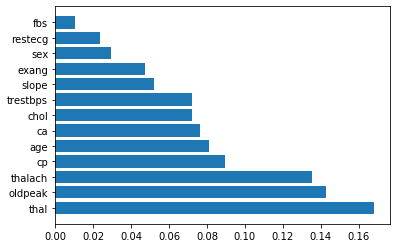

In [158]:
# visualize important featuers
plt.barh(a.index,a.values)

## Generating the Classifier on Selected Features

In [159]:
df1=df.loc[:,['cp','thalach','oldpeak','ca']]
df1.head()

,cp,thalach,oldpeak,ca
0,2,187,3.5,0
1,1,172,1.4,0
2,1,178,0.8,0
3,0,163,0.6,0
4,0,148,0.4,0


In [160]:
df1_scale = preprocessing.scale(df1)

In [161]:
df1_train,df1_test,y_train1,y_test1=train_test_split(df1,y,test_size=0.33)

In [162]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(df1_train, y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [163]:
predict_df1= clf.predict(df1_test)
predict_df1

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [164]:
accuracy_score(predict_df1, y_test1)

0.7291666666666666

## Try other classifiers like AdaBoost

In [165]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(df1_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [166]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [167]:
c= clf.predict(X_test)

In [168]:
accuracy_score(c, y_test)

0.7604166666666666